In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load the dataset
data = pd.read_csv("./data/NCRB_CII-2019_Table_19B.2.csv")

# clean column names - strip whitespaces ,lowercase, replace spaces with underscores
data.columns = data.columns.str.strip().str.lower().str.replace(' ','_').str.replace('-','_')

# rename a few long column names for clarity
data.rename(columns={
    'total_____male': 'total_male',
    'total_____female': 'total_female',
    'total_____total_persons_arrested_by_age_and_sex': 'total_arrests', 
},  
            inplace=True)

# drop s._no column
if 's._no'in data.columns:
    data.drop(columns='s._no', inplace=True)

# check and handle missing values
data.fillna(0, inplace=True)

# convert relevant columns to integer 
numeric_cols = data.columns.drop('city')
data[numeric_cols] = data[numeric_cols].astype(int)

# set city as index for easier analysis
data.set_index('city', inplace=True)

print(data.head())

                        juveniles_apprehended___boys  \
city                                                   
Ahmedabad (Gujarat)                              298   
Bengaluru(Karnataka)                             197   
Chennai(Tamil Nadu)                              816   
Coimbatore(Tamil Nadu)                            35   
Delhi                                           3073   

                        juveniles_apprehended___girls  \
city                                                    
Ahmedabad (Gujarat)                                 0   
Bengaluru(Karnataka)                                3   
Chennai(Tamil Nadu)                                 0   
Coimbatore(Tamil Nadu)                              0   
Delhi                                               2   

                        juveniles_apprehended___total  \
city                                                    
Ahmedabad (Gujarat)                               298   
Bengaluru(Karnataka)                

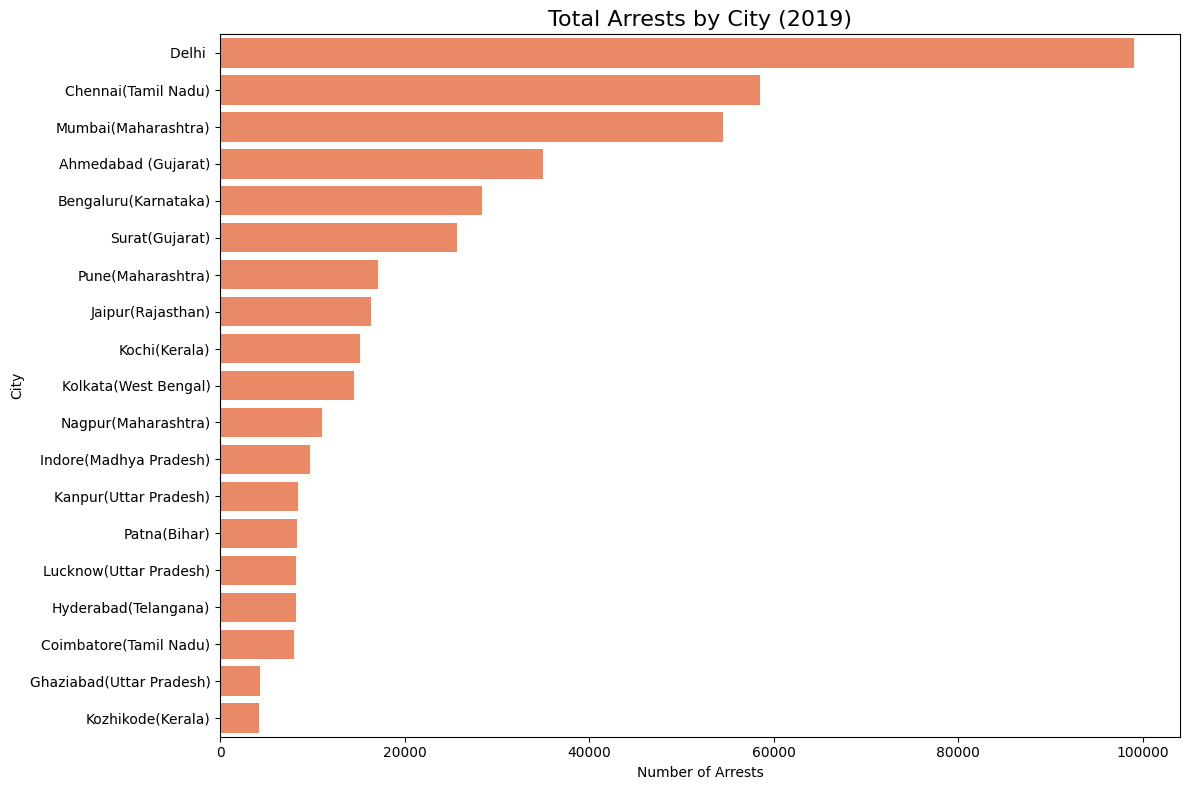

In [68]:
# prepare thedata
data_cleaned = data.drop(index='TOTAL CITIES')
top_cities = data_cleaned['total_arrests'].sort_values(ascending=False).reset_index()

# create the barplot
plt.figure(figsize=(12,8))
sns.barplot(data=top_cities, y='city', x='total_arrests', color='coral')

# titles and labels
plt.title("Total Arrests by City (2019)", fontsize=16)
plt.xlabel("Number of Arrests")
plt.ylabel("City")
plt.tight_layout()
plt.savefig('Total Arrests by City (2019).png')
plt.show()

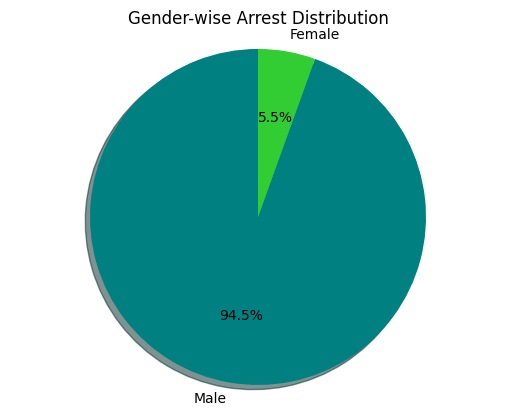

In [69]:
# prepare the data
gender_totals = data_cleaned[['total_male', 'total_female']].sum()

# plot the pie chart
plt.pie(gender_totals, labels=['Male', 'Female'], colors = ['teal', 'limegreen'], shadow = True, autopct = "%1.1f%%", startangle = 90) 
plt.title("Gender-wise Arrest Distribution")
plt.axis('equal')
plt.savefig("Gender-wise Arrest Distribution.png")
plt.show()

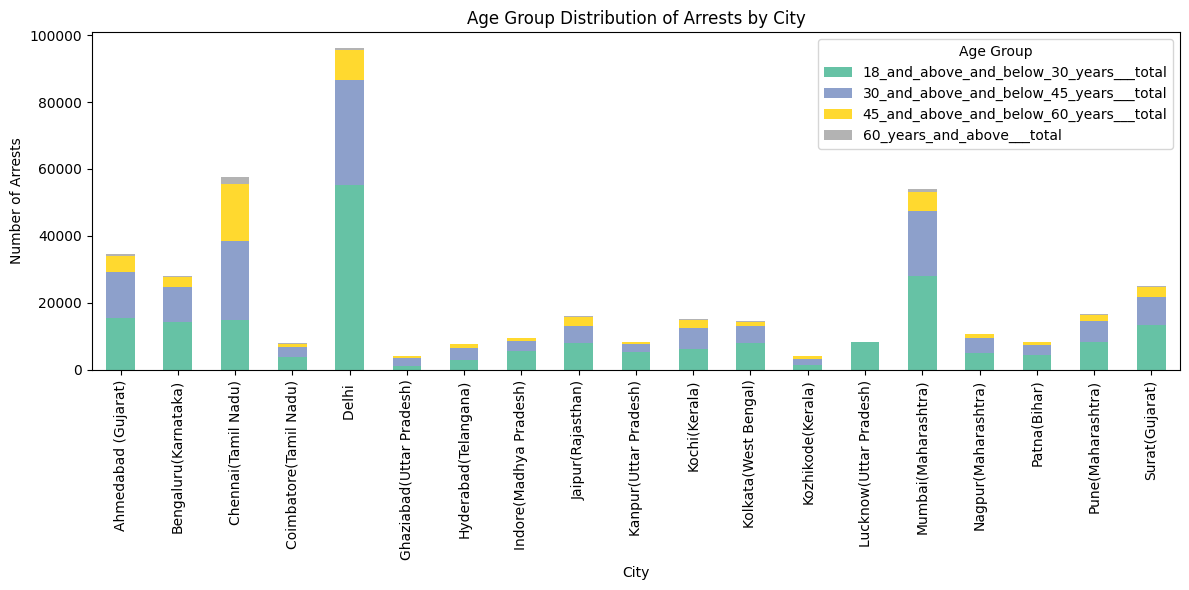

In [70]:
# prepare the data
age_columns = [
    '18_and_above_and_below_30_years___total',
    '30_and_above_and_below_45_years___total',
    '45_and_above_and_below_60_years___total',
    '60_years_and_above___total'
]

# plot stacked bar chart
data_cleaned[age_columns].plot(kind='bar', colormap='Set2', stacked=True, figsize=(12,6))

# titles and labels
plt.title('Age Group Distribution of Arrests by City')
plt.xlabel("City")
plt.ylabel("Number of Arrests")
plt.legend(title="Age Group", loc='upper right')
plt.tight_layout()
plt.savefig('Age Group Distribution of Arrests by City.png')
plt.show()

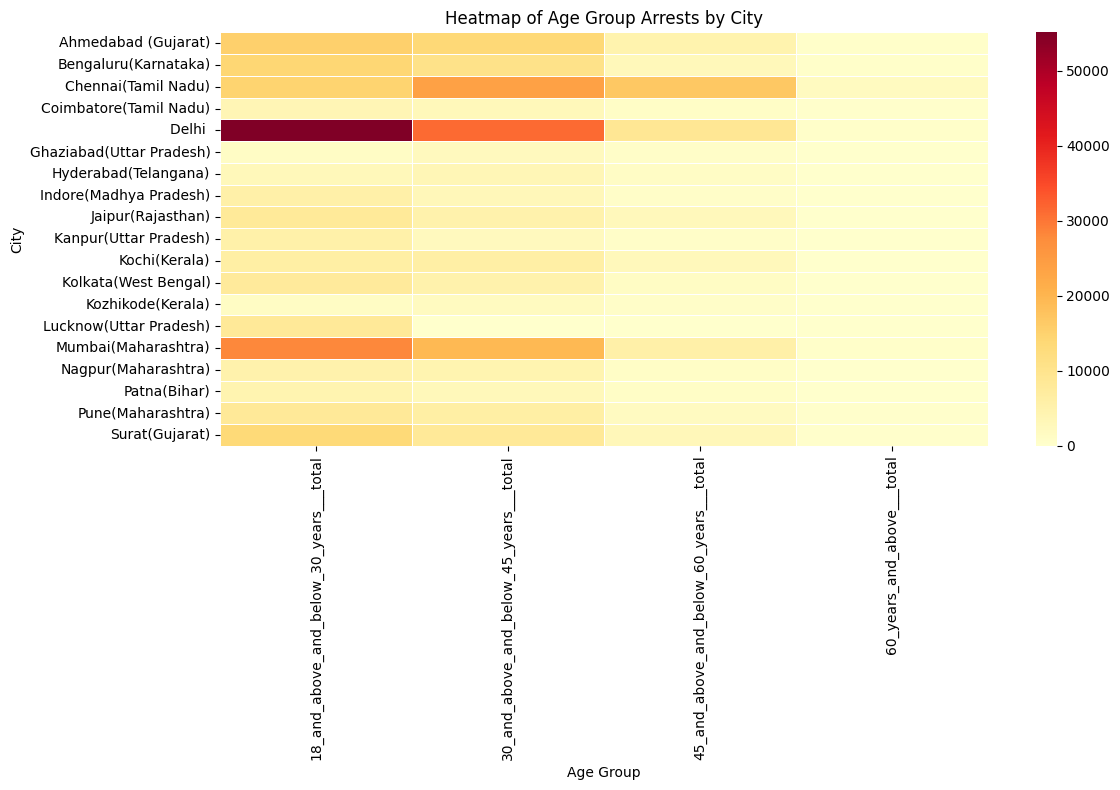

In [81]:
# heatmap of age group arrests by city
plt.figure(figsize=(12,8))
sns.heatmap(data_cleaned[age_columns], cmap='YlOrRd', annot=False, linewidths=0.5)


# titles and labels
plt.title("Heatmap of Age Group Arrests by City")
plt.xlabel("Age Group")
plt.ylabel("City")
plt.tight_layout()
plt.savefig("Heatmap of Age Group Arrests by City.png")
plt.show()

C:\Users\Daksha\AppData\Local\Temp\ipykernel_4112\3539755300.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_juveniles, x='juveniles_apprehended___total', y='city', palette='mako')


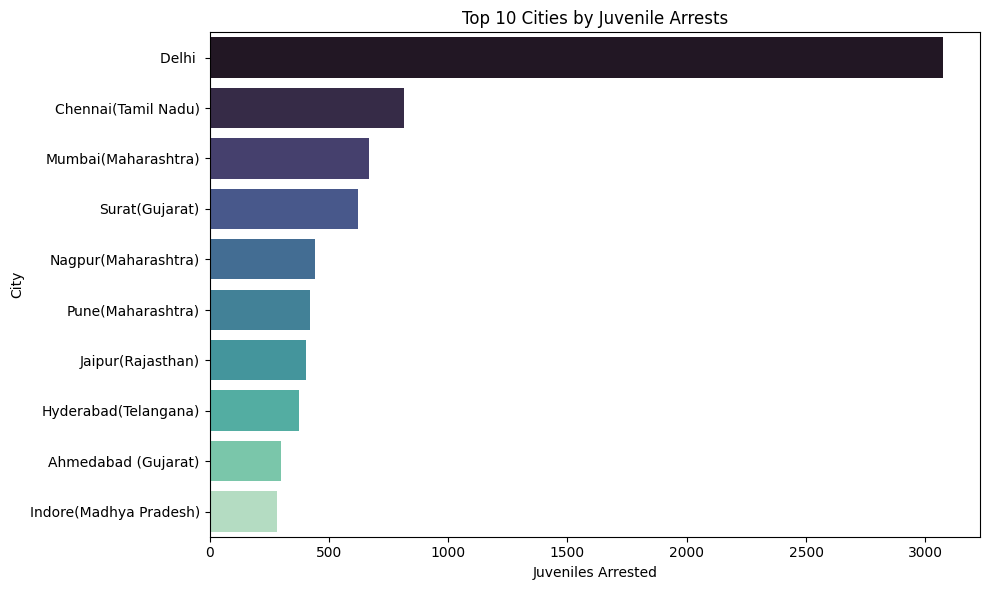

In [86]:
# prepare the data
top_juveniles = data_cleaned['juveniles_apprehended___total'].sort_values(ascending=False).head(10).reset_index()

# plot the bar graph
plt.figure(figsize=(10,6))
sns.barplot(data=top_juveniles, x='juveniles_apprehended___total', y='city', palette='mako')

#titles & labels
plt.title("Top 10 Cities by Juvenile Arrests")
plt.xlabel("Juveniles Arrested")
plt.ylabel("City")
plt.tight_layout()
plt.savefig("Top 10 Cities by Juvenile Arrests.png")
plt.show()